In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Negative Image:
    Subtract from maximum possible value of the range.
    negative image is that image in which heigher intensities are interchanged with lower i.e 255 to 0 and 254 to 1 and so one...
    the obtained image is called negative of that image..
    if we already known that the heigher value of the input image is 255 then just subtract the image from 255...
    if we don't know about the heigest intensities of an input image than use max() on the image and then subtract from this...
    The graph of negative image is linear...

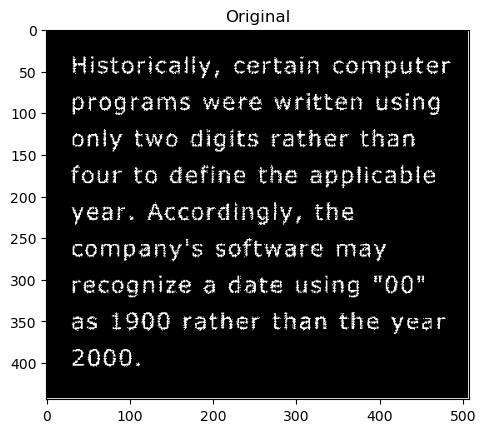

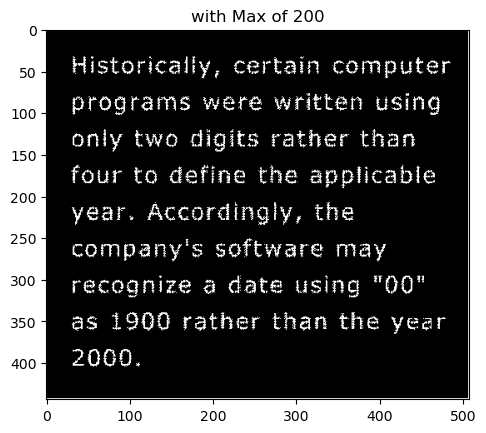

255 255


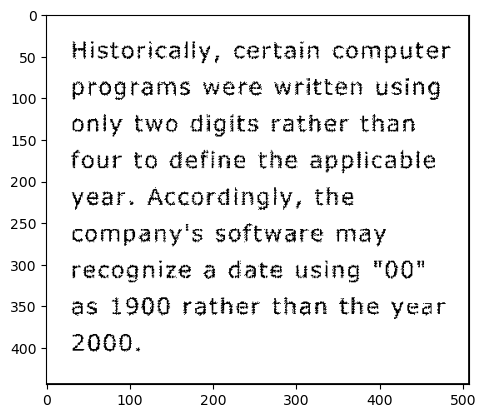

In [10]:
img = cv2.imread('./text.tif', 0)
plt.imshow(img, cmap='gray'); plt.title('Original')
plt.show()
img2 = np.where(img>200, 200, img)
plt.title('with Max of 200'); plt.imshow(img, cmap='gray')
plt.show()
print(img.max(), np.max(img))

negative_img = img.max()-img
plt.imshow(negative_img, 'gray'); plt.show()

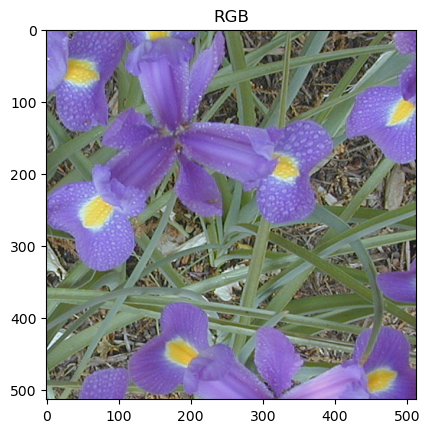

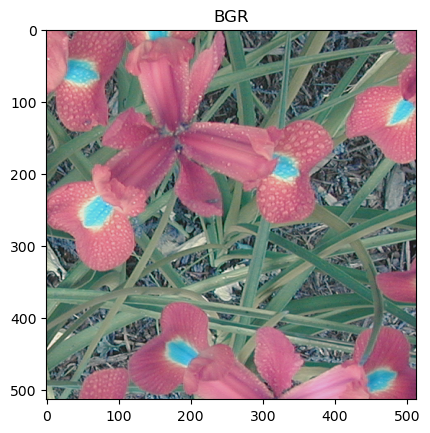

In [20]:
bgr_img = cv2.imread('./Fig0635(top_ left_flower).tif')
rgb_img = bgr_img[:,:,::-1]
plt.imshow(rgb_img); plt.title('RGB'); plt.show();
plt.imshow(bgr_img); plt.title('BGR'); plt.show(); 

In [21]:
# 255-img will negate the image.. 
# if hieghest intensity is other than 255 then "max()" approach is better
img = cv2.imread('./Fig0304(a)(breast_digital_Xray).tif',0)
cv2.imshow('Original', img)
negative = 255-img # np.max(img)-img
cv2.imshow('Negative breast', negative)
cv2.waitKey(0)
cv2.destroyAllWindows()

### log transformation
    This will reduce the higher intensities and spread the lower intensities in the image
    it is clear from the graph the heigher values are reduced so that they get norrower and lower intensities are gradually less reduced as compared to heigher intensities

(256, 256)


C:\Users\kaleem ullah\AppData\Local\Temp\ipykernel_5856\3682652667.py:4: RuntimeWarning: divide by zero encountered in log
  frame = 20*np.log(img+1)


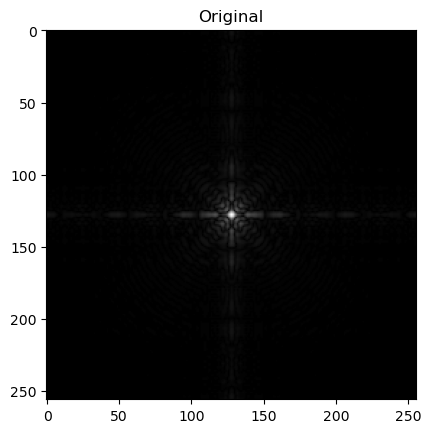

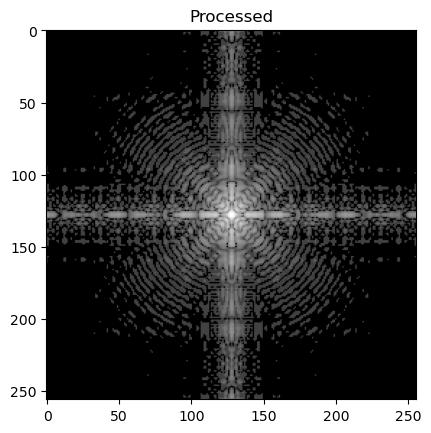

	Value at location [0,0] in original image is:
	 3
	Value at location [0,0] in resultant image is:
	 27.734375


In [4]:
img = cv2.imread('./log.tif', 0)
frame = np.zeros((img.shape[0], img.shape[1]))
print(img.shape)
frame = 20*np.log(img+1)
# frame *= 255
# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         frame[i,j] = 20*np.log(img[i,j]+1)

plt.imshow(img, 'gray'); plt.title('Original'); plt.show()
plt.imshow(frame, 'gray'); plt.title('Processed'); plt.show()
print(f'\tValue at location [0,0] in original image is:\n\t {img[100,100]}')
print(f'\tValue at location [0,0] in resultant image is:\n\t {frame[100,100]}')
# plt.plot(img.flatten(), frame.flatten())
# plt.xlabel('Input'); plt.ylabel('Output')

### power transformation:
    This is is the inverse of log transformation..
    it will spread the higher intensities and reduces the lower intensities in the image..
    it will also set the intensities of output image in 0-255 range.. if exceeds it is subtracted from 255 until becomes fit in the range..
    s = c*r**gamma  it is sometimes used as
    s = c(r+E)**gamma  where c is a constant, E is epsilon and is a constant, gamma is a constant... all these can be varied for desired output

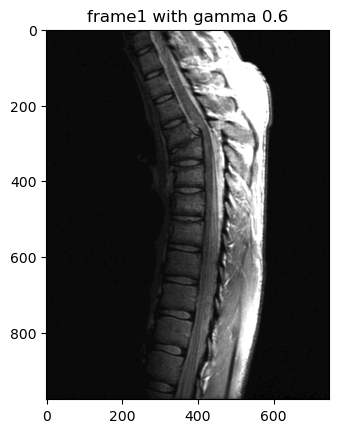

In [5]:
#implenting s = c(r+E)**gamma  where c =20, epsilon(E) = 10 and gamma is 0.4
img = cv2.imread('./spine.tif', cv2.IMREAD_GRAYSCALE)
frame1 = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')
frame2 = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')
frame3 = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        frame1[i,j] = (img[i,j]+10)**0.6   # s = c(r+E)**gamma, gamma = 0.6, 
        frame2[i,j] = 20*(img[i,j]+10)**0.4   # s = c(r+E)**gamma, gamma = 0.4
        frame3[i,j] = 20*(img[i,j]+10)**0.3   # s = c(r+E)**gamma, gamma = 0.3
plt.imshow(frame1, 'gray'); plt.title('frame1 with gamma 0.6'); plt.show()

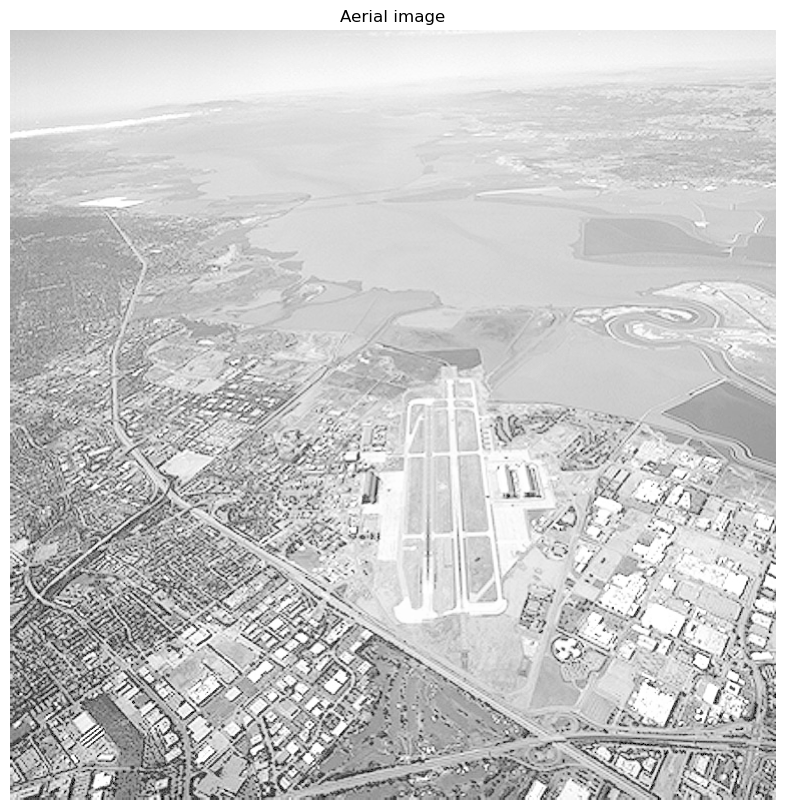

In [7]:
src_img = cv2.imread('./Fig0309(a)(washed_out_aerial_image).tif',0).astype(float)

plt.figure(figsize=(10,10))
plt.imshow(src_img,'gray')
plt.title('Aerial image')
plt.axis('off')
plt.show()

IndexError: list index out of range

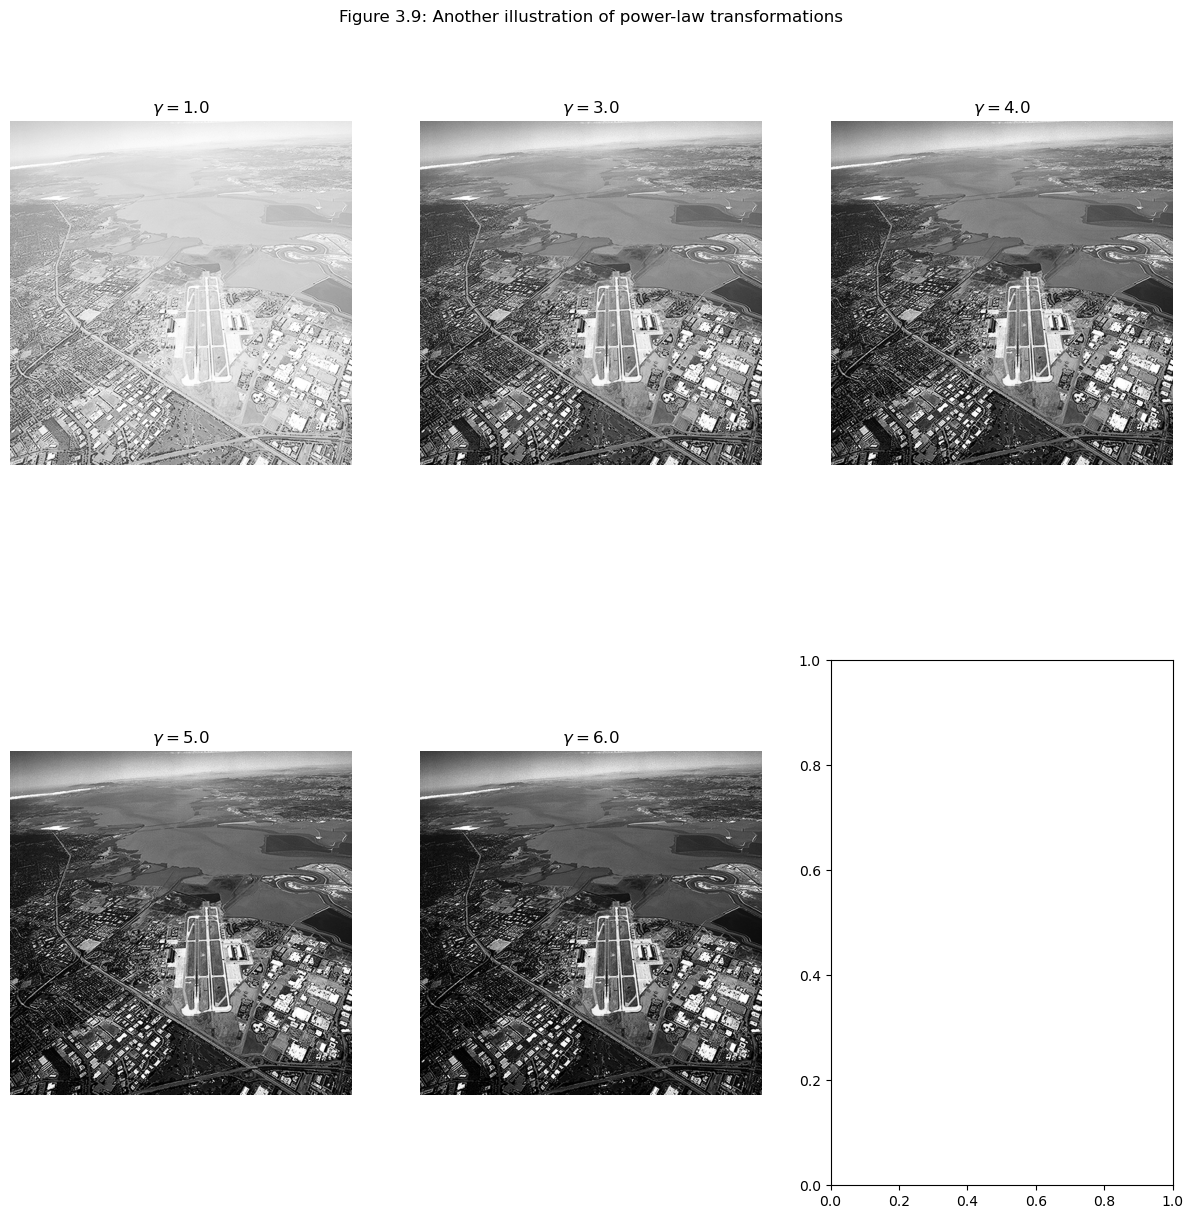

In [11]:
# contrast manipulation by power-law transformation
c = 1.0
gammas = [1.0, 3.0, 4.0, 5.0,6.0] # subfigure: a, b, c, d  --->  cr**g
dest_imgs = [c*src_img**gamma for gamma in gammas]
# plot Figure 3.9
fig = plt.figure(figsize=(15,15))
plt.title("Figure 3.9: Another illustration of power-law transformations")
plt.axis('off')
axeslist = fig.subplots(2,3)
for (i, axes) in enumerate(axeslist.ravel()):
    axes.imshow(dest_imgs[i],'gray')
    axes.set_title(f"$\gamma={gammas[i]}$")
    axes.set_axis_off()
plt.show()

### Erosion

In [3]:
img = cv2.imread('wire.tif', cv2.IMREAD_GRAYSCALE)
result = np.zeros((img.shape[0],img.shape[1]), dtype = 'uint8')
mask = np.ones((3,3), dtype= 'uint8')
img2 = np.pad(img,(1,1), 'constant')
#thresholding
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] >= 127:
            img[i,j] = 255
        else:
            img[i,j] = 0
cv2.imshow('Thresholded', img)
img2 = img2/255
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i,j] == mask[1,1] and img2[i,j+1] == mask[1,2] and img2[i,j-1]==mask[1,0] and img2[i+1,j]==mask[2,1] and img2[i+1,j+1]==mask[2,2] and img2[i+1,j-1]==mask[2,0] and img2[i-1,j-1]==mask[0,0] and img2[i-1,j]==mask[0,1] and img2[i-1,j+1] == mask[0,2]: 
            result[i,j]=255
        else:
            result[i,j] = 0
cv2.imshow('Eroded',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Dilation

In [5]:
img = cv2.imread('./holes.tif',cv2.IMREAD_GRAYSCALE)
img2 = np.pad(img,(1,1),'constant')
mask = np.ones((3,3),dtype = 'uint8')
result = np.zeros((img.shape[0],img.shape[1]),dtype = 'uint8')
#thresholding
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] >= 127:
            img[i,j] = 255
        else:
            img[i,j] = 0
#dilation
img2 = img2/255
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i,j]==mask[1,1] or img2[i,j+1] == mask[1,2] or img2[i,j-1] == mask[1,0] or img2[i-1,j] == mask[0,1] or img2[i-1,j+1] == mask[0,2] or img2[i-1,j-1] == mask[0,0] or img2[i+1,j] == mask[2,1] or img2[i+1,j+1] == mask[2,2] or img2[i+1,j-1]==mask[2,0]:
            result[i,j] = 255
        else:
            result[i,j] = 0
cv2.imshow('Orginal',img)
cv2.imshow('Dilated', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Opening
    - erode --> dilate

In [35]:
img = cv2.imread('fingerprint.tif', cv2.IMREAD_GRAYSCALE)
img2 = np.pad(img,(1,1),'constant')
result = np.zeros((img2.shape[0],img2.shape[1]), dtype = 'uint8')
mask = np.ones((3,3),dtype = 'uint8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] >= 127:
            img[i,j] = 255
        else:
            img[i,j] = 0
cv2.imshow('Thresholded',img)
img2 = img2/255
#erosion
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i,j]==mask[1,1] and img2[i,j+1] == mask[1,2] and img2[i,j-1] == mask[1,0] and img2[i-1,j-1] == mask[0,0] and img2[i-1,j] == mask[0,1] and img2[i-1,j+1] == mask[0,2] and img2[i+1,j-1] == mask[2,0] and img2[i+1,j]==mask[2,1] and img2[i+1,j+1] == mask[2,2]:
            result[i,j] = 255
        else:
            result[i,j] = 0
cv2.imshow('eroded',result)
result = result/255
#dilation
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if result[i,j] == mask[1,1] or result[i,j-1] == mask[1,0] or result[i,j+1] == mask[1,2] or result[i-1,j-1] == mask[0,0] or result[i-1,j] == mask[0,1] or result[i-1,j+1] == mask[0,2] or result[i+1,j-1] == mask[2,0] or result[i+1,j] == mask[2,1] or result[i+1,j+1] == mask[2,2]:
            result[i,j] = 255
        else:
            result[i,j] = 0
cv2.imshow('opening', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Closing
    - dilate --> erode

In [36]:
img = cv2.imread('fingerprint.tif', cv2.IMREAD_GRAYSCALE)
img2 = np.pad(img,(1,1),'constant')
result = np.zeros((img2.shape[0],img2.shape[1]), dtype = 'uint8')
mask = np.ones((3,3),dtype = 'uint8')
mask = mask
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] >= 127:
            img[i,j] = 255
        else:
            img[i,j] = 0
cv2.imshow('Thresholded',img)
img2 = img2/255

#dilation
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i,j] == mask[1,1] or img2[i,j-1] == mask[1,0] or img2[i,j+1] == mask[1,2] or img2[i-1,j-1] == mask[0,0] or img2[i-1,j] == mask[0,1] or img2[i-1,j+1] == mask[0,2] or img2[i+1,j-1] == mask[2,0] or img2[i+1,j] == mask[2,1] or img2[i+1,j+1] == mask[2,2]:
            result[i,j] = 255
        else:
            result[i,j] = 0
cv2.imshow('Dilated',result)

result = result/255
result2 = result.copy()

#erosion
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if result[i,j]==mask[1,1] and result[i,j+1] == mask[1,2] and result[i,j-1] == mask[1,0] and result[i-1,j-1] == mask[0,0] and result[i-1,j] == mask[0,1] and result[i-1,j+1] == mask[0,2] and result[i+1,j-1] == mask[2,0] and result[i+1,j]==mask[2,1] and result[i+1,j+1] == mask[2,2]:
            result2[i,j] = 255
        else:
            result2[i,j] = 0
cv2.imshow('Closing', result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
img = cv2.imread('face.tif', cv2.IMREAD_GRAYSCALE)
img2 = np.pad(img,(1,1),'constant')
result = img.copy()*0
mask = np.ones((3,3), dtype = 'uint8')
#thresholding
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j]>=127:
            img[i,j] = 255
        else:
            img[i,j] = 0
cv2.imshow('Thresholded', img)
img2=img2/255
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i,j]==mask[1,1] and img2[i,j+1]==mask[1,2] and img2[i,j-1] and img2[i-1,j-1] == mask[0,0] and img2[i-1,j]==mask[0,1] and img2[i-1,j+1]==mask[0,2] and img2[i+1,j-1]==mask[2,0] and img2[i+1,j]==mask[2,1] and img2[i+1,j+1]==mask[2,2]:
            result[i,j]=255
        else:
            result[i,j]=0
cv2.imshow('eroded',result)
final = img-result
cv2.imshow('Boundray',final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
def show(img, title):
    plt.imshow(img, 'gray')
    plt.title(title)
    plt.show()

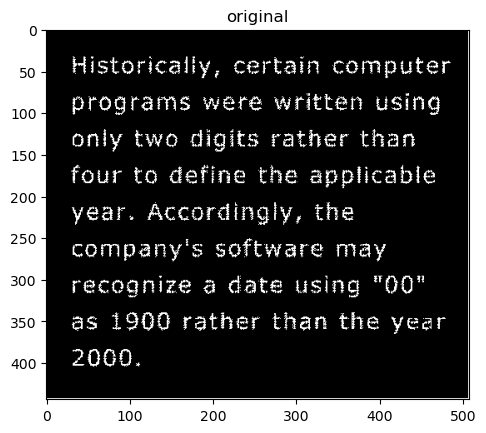

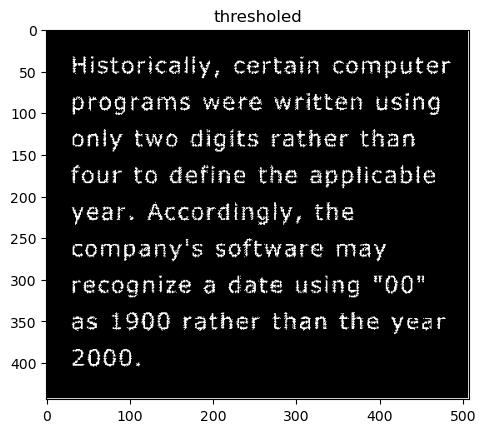

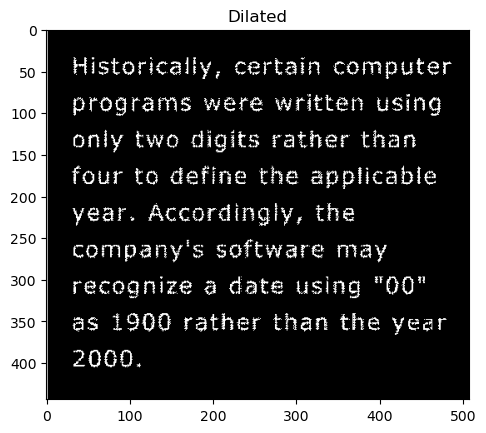

In [17]:
img = cv2.imread('./text.tif',0)
threshold_img = np.zeros((img.shape[0], img.shape[1]))
dilted = img.copy()*0

mask = np.ones((3,3))
# img2 = np.pad(img, (1,1), 'constant')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j]>127:
            threshold_img[i,j] = 255
show(img, 'original')
show(threshold_img, 'thresholed')
img2 = np.pad(threshold_img, (1,1), 'constant')/255
#dilation

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (img2[i,j] == mask[0,0] or img2[i,j]==mask[0,1] or img2[i,j]==mask[0,2] or img2[i,j]==mask[1,0] or img2[i,j]==mask[1,1] or img2[i,j]==mask[1,2] or img2[i,j]==mask[2,1] or img2[i,j]==mask[2,1] or img2[i,j]==mask[2,2]):
            dilted[i,j] = 255
show(dilted, 'Dilated')

In [29]:
image = np.array([[0,0,0,0,0],
                 [0,0,1,0,0],
                  [0,0,1,0,0],
                 [0,0,1,0,0],
                  [0,0,0,0,0]
                 ], dtype='uint8')
# image = cv2.imread('./text.tif', 0)
# th, image = cv2.threshold(image, 127,1, cv2.THRESH_BINARY)
kernel = np.ones((3,3), dtype='uint8')
p = kernel.shape[0]//2
p_img = np.pad(image, p, 'constant')
result = np.zeros((image.shape[0],image.shape[1]))
for i in range(p, img.shape[0]+1):
    for j in range(p, img.shape[1]+1):
        if np.any(p_img[i-p:i+p+1, j-p:j+p+1] & kernel):
            result[i-p, j-p] = 1
            
print(image)
print(kernel)
print(result)

ValueError: operands could not be broadcast together with shapes (3,2) (3,3) 

In [15]:
import numpy as np

# Define the kernel
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])

# Define the input image
image = np.array([[0, 0, 0, 0, 0],
                  [0, 1, 0, 1, 0],
                  [0, 0, 0, 0, 0],
                  [0, 1, 0, 1, 0],
                  [0, 0, 0, 0, 0]])

# Define kernel size and padding
kernel_size = kernel.shape[0]
padding = kernel_size // 2

# Pad the image
padded_image = np.pad(image, padding, mode='constant')

# Create an empty array for the dilated image
dilated_image = np.zeros_like(image)

# Perform dilation
for i in range(padding, image.shape[0] + padding):
    for j in range(padding, image.shape[1] + padding):
        if np.any(padded_image[i - padding: i + padding + 1, j - padding: j + padding + 1] & kernel):
            dilated_image[i - padding, j - padding] = 1

# Print the dilated image
print(dilated_image)


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [27]:
image.any()==1

True